# `clust-learn` - Module 3: Clustering 聚类

This guide shows how to use the `clustering` module of the `clust-learn` package to compute and explain clusters.

本指南展示了如何使用clust-learn包中的clustering模块来计算和解释聚类。

## 0. Setup

In [122]:
import numpy as np
import pandas as pd

from clearn.clustering import Clustering
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## 1. Data loading

DataFrame with extracted dimensions.

提取降维后的数据框。

In [123]:
df = pd.read_csv('data2/ATG_modified_preprocessed_dim_red_output.csv')
print(df.shape)
df.head()

(330, 21)


,dim_01,dim_02,dim_03,dim_04,dim_05,dim_06,dim_07,dim_08,dim_09,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19,dim_20,dim_21
0,-0.0565,-0.7214,1.2332,0.7951,1.1527,-0.2091,-0.1594,1.7278,-0.0141,-0.2769,-0.0161,-0.1225,0.0832,-0.0243,-0.0239,-0.2312,0.0632,0.1004,-0.0841,0.0975,-0.2848
1,-0.0304,-1.0979,-0.9567,0.1866,1.1887,-0.5695,0.1742,1.1163,0.0638,-0.1357,-0.0055,-0.3182,0.1762,-0.0550,0.0646,-0.2384,-0.1030,0.2608,-0.0544,0.1335,-0.1355
2,0.9643,-1.3475,0.0189,-0.6470,3.5651,0.1839,-0.3672,-0.8199,-0.2415,-0.1434,-0.0974,-0.0761,0.3990,-0.0349,0.2462,-0.0865,0.1196,-0.0829,-0.0463,-0.0834,0.0772
3,-0.4649,-1.3436,-0.4665,-0.5140,-0.1252,-0.3609,-0.9107,-0.8199,-0.5086,0.2245,-0.3141,0.4398,0.4370,-0.0504,0.2755,0.1101,0.0028,-0.3055,0.0346,0.4173,-0.2689
4,-2.2770,-1.5972,-0.4681,0.3279,2.9257,-0.0664,-2.7236,-1.0237,-0.2968,-0.2901,0.0457,0.5061,0.2996,-0.3610,0.0501,-0.3891,0.1417,0.0416,-0.0495,0.1451,-0.1093


DataFrame with original variables. This will later be used for results interpretation.

包含原始变量的数据框。这将在稍后用于结果解释。


In [124]:
df_original = pd.read_csv('data2/ATG_modified_preprocess_ouput.csv')
print(df_original.shape)
df_original.head()

(330, 175)


,LINK_index,ATBG01,ATBR01A,ATBR01B,ATBR02A,ATBR02B,ATBR04,ATBR05,ATBGEAS,ATBGSOS,ATBGTJS,ATBGSLI,ATDGLIHY,ATDGRIHY,ITLANG_TQ,LCID_TQ,ATBG02,ATBG03,ATBG04,ATBG05AA,ATBG05AB,ATBG05AC,ATBG05AD,ATBG05BA,ATBG05BB,ATBG05BC,ATBG05BD,ATBG05BE,ATBG05BF,ATBG05BG,ATBG05BH,ATBG05BI,ATBG05BJ,ATBG05BK,ATBG06,ATBG07AA,ATBG07BA,ATBG07AB,ATBG07BB,ATBG07AC,ATBG07BC,ATBG07AD,ATBG07BD,ATBG07AE,ATBG07BE,ATBG07AF,ATBG07BF,ATBG07AG,ATBG07BG,ATBG08A,ATBG08B,ATBG08C,ATBG08D,ATBG08E,ATBG09A,ATBG09B,ATBG09C,ATBG09D,ATBG10A,ATBG10B,ATBG10C,ATBG10D,ATBG10E,ATBG10F,ATBG10G,ATBG10H,ATBG10I,ATBG10J,ATBG10K,ATBG10L,ATBG11A,ATBG11B,ATBG11C,ATBG11D,ATBG11E,ATBG11F,ATBG11G,ATBG11H,ATBG11I,ATBG12A,ATBG12B,ATBG12C,ATBG12D,ATBG12E,ATBG12F,ATBR03A,ATBR03B,ATBR03C,ATBR03D,ATBR03E,ATBR03F,ATBR03G,ATBR03H,ATBR06A,ATBR06B,ATBR06C,ATBR06D,ATBR06E,ATBR07AA,ATBR07AB,ATBR07AC,ATBR07AD,ATBR07BA,ATBR07BB,ATBR07BC,ATBR07BD,ATBR08A,ATBR08B,ATBR08C,ATBR08D,ATBR08E,ATBR08F,ATBR08G,ATBR08H,ATBR09A,ATBR09B,ATBR09C,ATBR09D,ATBR09E,ATBR09F,ATBR09G,ATBR09H,ATBR09I,ATBR10A,ATBR10B,ATBR10C,ATBR10D,ATBR10E,ATBR10F,ATBR10G,ATBR10H,ATBR10I,ATBR10J,ATBR10K,ATBR10L,ATBR11A,ATBR11B,ATBR11C,ATBR11D,ATBR11E,ATBR12A,ATBR12BA,ATBR12BB,ATBR12BC,ATBR12BD,ATBR12C,ATBR12DA,ATBR12DB,ATBR12DC,ATBR12EA,ATBR12EB,ATBR12EC,ATBR12ED,ATBR12EE,ATBR13A,ATBR13B,ATBR13C,ATBR13D,ATBR13E,ATBR14,ATBR15,ATBR16,ATBR17A,ATBR17B,ATBR17C,ATBR18A,ATBR18B,ATBR18C,ATBR18D,ATBR18E,ATBR19,ATDGEAS,ATDGSOS,ATDGTJS,ATDGSLI
0,44650015001011500101014,32.0000,34.0000,34.0000,1.0000,8.0000,280.0000,90.0000,9.4411,13.6815,8.6795,10.2793,182.0000,58.5000,10.0000,5124.0000,1.0000,5.0000,4.0000,1.0000,2.0000,2.0000,1.0000,3.0000,2.0000,3.0000,3.0000,2.0000,3.0000,2.0000,2.0000,2.0000,3.0000,2.0000,3.0000,1.0000,1.0000,2.0000,1.0000,2.0000,1.0000,2.0000,1.0000,2.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,2.0000,2.0000,3.0000,2.0000,1.0000,2.0000,2.0000,2.0000,2.0000,2.0000,3.0000,3.0000,3.0000,3.0000,2.0000,3.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,1.0000,2.0000,2.0000,1.0000,2.0000,1.0000,2.0000,2.0000,4.0000,4.0000,3.0000,2.0000,1.0000,3.0000,4.0000,2.0000,1.0000,3.0000,3.0000,3.0000,2.0000,2.0000,2.0000,2.0000,2.0000,3.0000,3.0000,3.0000,1.0000,3.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,3.0000,3.0000,2.0000,3.0000,3.0000,3.0000,2.0000,2.0000,3.0000,3.0000,4.0000,2.0000,2.0000,2.0000,2.0000,2.0000,4.0000,3.0000,3.0000,3.0000,4.0000,4.0000,4.0000,4.0000,4.0000,1.0000,3.0000,3.0000,1.0000,1.0000,4.0000,5.0000,3.0000,1.0000,2.0000,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,5.0000,2.0000,1.0000,2.0000,2.0000
1,44650015001033500103034,26.0000,25.0000,25.0000,1.0000,8.0000,280.0000,60.0000,9.4411,11.5916,8.0184,10.9041,182.0000,39.0000,10.0000,5124.0000,1.0000,5.0000,4.0000,1.0000,2.0000,2.0000,1.0000,3.0000,3.0000,3.0000,3.0000,2.0000,3.0000,3.0000,3.0000,3.0000,2.0000,3.0000,1.0000,1.0000,1.0000,1.0000,3.0000,1.0000,2.0000,1.0000,2.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,1.0000,2.0000,2.0000,2.0000,3.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,3.0000,3.0000,2.0000,4.0000,2.0000,3.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.0000,2.0000,2.0000,2.0000,2.0000,3.0000,2.0000,2.0000,1.0000,2.0000,1.0000,2.0000,2.0000,1.0000,1.0000,3.0000,3.0000,2.0000,2.0000,2.0000,1.0000,2.0000,3.0000,4.0000,3.0000,3.0000,1.0000,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,2.0000,3.0000,3.0000,2.0000,2.0000,2.0000,2.0000,2.0000,4.0000,2.0000,3.0000,3.0000,1.0000,2.0000,1.0000,1.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,3.0000,3.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,4.0000,3.0000,3.0000,3.0000,4.0000,4.0000,4.0000,4.0000,4.0000,1.0000,4.0000,4.0000,1.0000,1.0000,3.0000,3.0000,2.0000,1.0000,2.0000,2.0000,2.0000,2.0000,2.0000,1.0000,1.0000,5.0000,2.0000,1.0000,2.0000,1.0000
2,44650025002011500201014,7.0000,29.

We separate numerical and categorical variables from the original set of variables.

我们从原始变量集中分离数值变量和分类变量。


In [125]:
 
num_vars = ['ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 
            'ATBR04', 'ATBR05', 'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
cat_vars = ['ITLANG_TQ', 'LCID_TQ', 'ATBG02', 'ATBG03', 'ATBG04', 'ATBG05AA', 'ATBG05AB', 
            'ATBG05AC', 'ATBG05AD', 'ATBG05BA', 'ATBG05BB', 'ATBG05BC', 'ATBG05BD', 'ATBG05BE', 'ATBG05BF',
              'ATBG05BG', 'ATBG05BH', 'ATBG05BI', 'ATBG05BJ', 'ATBG05BK', 'ATBG06', 'ATBG07AA', 'ATBG07BA',
                'ATBG07AB', 'ATBG07BB', 'ATBG07AC', 'ATBG07BC', 'ATBG07AD', 'ATBG07BD', 'ATBG07AE', 'ATBG07BE', 
                'ATBG07AF', 'ATBG07BF', 'ATBG07AG', 'ATBG07BG', 'ATBG08A', 'ATBG08B', 'ATBG08C', 'ATBG08D',
                  'ATBG08E', 'ATBG09A', 'ATBG09B', 'ATBG09C', 'ATBG09D', 'ATBG10A', 'ATBG10B', 'ATBG10C', 
                  'ATBG10D', 'ATBG10E', 'ATBG10F', 'ATBG10G', 'ATBG10H', 'ATBG10I', 'ATBG10J', 'ATBG10K', 
                  'ATBG10L', 'ATBG11A', 'ATBG11B', 'ATBG11C', 'ATBG11D', 'ATBG11E', 'ATBG11F', 'ATBG11G', 
                  'ATBG11H', 'ATBG11I', 'ATBG12A', 'ATBG12B', 'ATBG12C', 'ATBG12D', 'ATBG12E', 'ATBG12F', 
                  'ATBR03A', 'ATBR03B', 'ATBR03C', 'ATBR03D', 'ATBR03E', 'ATBR03F', 'ATBR03G', 'ATBR03H', 
                  'ATBR06A', 'ATBR06B', 'ATBR06C', 'ATBR06D', 'ATBR06E', 'ATBR07AA', 'ATBR07AB', 'ATBR07AC', 
                  'ATBR07AD', 'ATBR07BA', 'ATBR07BB', 'ATBR07BC', 'ATBR07BD', 'ATBR08A', 'ATBR08B', 'ATBR08C', 
                  'ATBR08D', 'ATBR08E', 'ATBR08F', 'ATBR08G', 'ATBR08H', 'ATBR09A', 'ATBR09B', 'ATBR09C', 
                  'ATBR09D', 'ATBR09E', 'ATBR09F', 'ATBR09G', 'ATBR09H', 'ATBR09I', 'ATBR10A', 'ATBR10B', 
                  'ATBR10C', 'ATBR10D', 'ATBR10E', 'ATBR10F', 'ATBR10G', 'ATBR10H', 'ATBR10I', 'ATBR10J', 
                  'ATBR10K', 'ATBR10L', 'ATBR11A', 'ATBR11B', 'ATBR11C', 'ATBR11D', 'ATBR11E', 'ATBR12A', 
                  'ATBR12BA', 'ATBR12BB', 'ATBR12BC', 'ATBR12BD', 'ATBR12C', 'ATBR12DA', 'ATBR12DB', 'ATBR12DC', 
                  'ATBR12EA', 'ATBR12EB', 'ATBR12EC', 'ATBR12ED', 'ATBR12EE', 'ATBR13A', 'ATBR13B', 'ATBR13C', 
                  'ATBR13D', 'ATBR13E', 'ATBR14', 'ATBR15', 'ATBR16', 'ATBR17A', 'ATBR17B', 'ATBR17C', 'ATBR18A', 
                  'ATBR18B', 'ATBR18C', 'ATBR18D', 'ATBR18E', 'ATBR19', 'ATDGEAS', 'ATDGSOS', 'ATDGTJS', 'ATDGSLI']

We make a selection of the original variables for some visualizations.
我们选择了一些原始变量来进行可视化。


In [126]:
num_vars_sel = ['ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 
            'ATBR04', 'ATBR05', 'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']

## 1. Clustering computation 聚类计算


We compare k-means, agglomerative clustering with Ward's linkage, and Gaussian Mixture models. We don't normalize the data (`normalize=False`) because we're using the components extracted from the dimensionality reduction process.

我们比较了k-means、具有Ward链接的凝聚聚类以及高斯混合模型。我们没有对数据进行标准化（`normalize=False`），因为我们使用的是从降维过程中提取的成分。


In [127]:
km = KMeans(random_state=42)
ward = AgglomerativeClustering()
gmm = GaussianMixture()

In [128]:
# 创建三种聚类算法实例，并通过Clustering类封装数据。
# K均值适合球形簇，层次聚类适合层级结构，高斯混合模型适合复杂分布。
cl = Clustering(df, algorithms= [km, ward, gmm], normalize=False)

In [129]:
cl.df.describe()

,dim_01,dim_02,dim_03,dim_04,dim_05,dim_06,dim_07,dim_08,dim_09,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19,dim_20,dim_21
count,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000,330.0000
mean,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000
std,1.3953,1.3937,1.3683,1.1522,1.1354,1.0091,1.0016,0.9916,0.3582,0.2526,0.2306,0.2225,0.2208,0.1941,0.1891,0.1831,0.1806,0.1773,0.1743,0.1717,0.1694
min,-3.1408,-1.7269,-6.3061,-3.4993,-1.1958,-2.3505,-3.9804,-1.4313,-0.8582,-0.4599,-0.5675,-0.4528,-0.7427,-0.6955,-0.6084,-0.5568,-0.5375,-0.4440,-0.4736,-0.5941,-0.6497
25%,-0.5443,-0.9153,-0.7101,-0.8356,-0.8299,-0.6195,-0.5976,-0.9218,-0.2565,-0.2101,-0.1577,-0.1498,-0.1353,-0.1097,-0.1196,-0.1158,-0.0888,-0.1193,-0.1135,-0.0951,-0.1114
50%,-0.1223,-0.3450,0.0195,-0.1361,-0.3422,-0.0597,-0.0348,-0.0046,0.0079,-0.0401,-0.0104,-0.0165,0.0101,-0.0151,-0.0076,-0.0115,0.0083,-0.0049,-0.0140,-0.0077,0.0034
75%,0.4021,0.6265,0.9929,0.8077,0.4391,0.7992,0.6588,0.8106,0.2193,0.1972,0.1425,0.1125,0.1374,0.1163,0.1202,0.1345,0.0940,0.1095,0.1181,0.0938,0.1125
max,17.7740,7.4619,3.1834,3.1353,7.4797,1.6176,2.5753,2.5430,0.9934,0.6460,0.7110,0.9330,0.8258,0.7991,0.8785,0.5616,1.1808,0.7293,0.6551,0.6528,0.7384


The code below computes the optimal number of clusters between 2 and 21 and adds the prefict `'TEA'` (from the word teacher) to the cluster labels.

以下代码计算了在2到21之间的最优聚类数，并在聚类标签前添加了前缀'TEA'（来自单词“teacher”）。

As performance metric teh default one is used (WSS or inertia - `metric='inertia'`).

作为性能指标，默认使用了WSS或惯性（metric='inertia'）。

In [130]:
# 在2到21个聚类范围内寻找最优聚类数，并为聚类标签添加前缀TEA。
# 返回每个样本的聚类标签。
cl.compute_clusters(max_clusters = 21, prefix='TEA')

array([2, 2, 2, 3, 2, 3, 5, 1, 1, 1, 5, 5, 5, 1, 5, 5, 2, 3, 0, 3, 3, 3,
       3, 3, 6, 6, 3, 3, 3, 1, 3, 2, 3, 2, 1, 1, 1, 0, 5, 2, 0, 0, 6, 2,
       6, 0, 5, 5, 5, 2, 2, 2, 2, 2, 2, 3, 3, 6, 6, 6, 6, 1, 5, 5, 2, 6,
       6, 1, 3, 5, 5, 1, 1, 3, 3, 1, 1, 1, 1, 1, 6, 6, 5, 2, 5, 2, 6, 6,
       6, 3, 1, 6, 6, 3, 3, 1, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 1, 1, 1,
       0, 0, 3, 3, 2, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 5, 2, 3, 1, 3, 5,
       3, 2, 3, 1, 1, 3, 2, 3, 3, 0, 5, 6, 5, 2, 5, 3, 3, 5, 1, 3, 0, 5,
       3, 3, 0, 0, 0, 6, 1, 0, 3, 6, 3, 3, 3, 3, 3, 6, 2, 3, 3, 3, 0, 3,
       3, 1, 2, 3, 3, 1, 0, 2, 0, 0, 3, 0, 3, 3, 3, 3, 5, 3, 5, 3, 2, 3,
       1, 6, 3, 6, 6, 1, 6, 1, 0, 3, 5, 3, 3, 6, 3, 3, 3, 3, 6, 1, 3, 6,
       6, 1, 6, 6, 6, 6, 3, 3, 0, 6, 3, 5, 6, 3, 3, 6, 0, 0, 6, 0, 1, 6,
       1, 5, 6, 3, 2, 1, 6, 0, 3, 6, 3, 6, 3, 3, 2, 6, 6, 6, 1, 6, 6, 2,
       3, 5, 3, 2, 6, 5, 1, 3, 6, 4, 3, 6, 5, 3, 6, 1, 1, 6, 6, 3, 3, 3,
       6, 3, 5, 6, 6, 3, 3, 5, 3, 1, 3, 2, 3, 6, 3,

In [131]:
# 存储三个聚类模型的评分或评估指标。
cl.scores_

{'KMeans(random_state=42)': [np.float64(3943.3786381466352),
  np.float64(3428.526502181684),
  np.float64(3183.907709629492),
  np.float64(2896.669755525694),
  np.float64(2684.169037564564),
  np.float64(2441.035176174347),
  np.float64(2292.8906571403945),
  np.float64(2447.754540069969),
  np.float64(2316.963282625323),
  np.float64(2017.4327142806465),
  np.float64(1957.9045848149945),
  np.float64(1855.4693237148344),
  np.float64(1820.139306147253),
  np.float64(1747.871616485169),
  np.float64(1714.4522452084102),
  np.float64(1679.311196107376),
  np.float64(1656.41169413939),
  np.float64(1599.0841714418073),
  np.float64(1564.9901098586229),
  np.float64(1517.7393152668792),
  np.float64(1423.2178909789197)],
 'AgglomerativeClustering()': [np.float64(3943.3786381466352),
  np.float64(3477.2669564714924),
  np.float64(3161.4953468713534),
  np.float64(2929.0050107804045),
  np.float64(2731.896353120924),
  np.float64(2573.1612064951596),
  np.float64(2439.231568049356),
  np.

In [132]:
# 存储聚类模型对数据点的聚类标签（cluster labels）。这些标签表示每个数据点被分配到的聚类编号。
cl.labels_

array([2, 2, 2, 3, 2, 3, 5, 1, 1, 1, 5, 5, 5, 1, 5, 5, 2, 3, 0, 3, 3, 3,
       3, 3, 6, 6, 3, 3, 3, 1, 3, 2, 3, 2, 1, 1, 1, 0, 5, 2, 0, 0, 6, 2,
       6, 0, 5, 5, 5, 2, 2, 2, 2, 2, 2, 3, 3, 6, 6, 6, 6, 1, 5, 5, 2, 6,
       6, 1, 3, 5, 5, 1, 1, 3, 3, 1, 1, 1, 1, 1, 6, 6, 5, 2, 5, 2, 6, 6,
       6, 3, 1, 6, 6, 3, 3, 1, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 1, 1, 1,
       0, 0, 3, 3, 2, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 5, 2, 3, 1, 3, 5,
       3, 2, 3, 1, 1, 3, 2, 3, 3, 0, 5, 6, 5, 2, 5, 3, 3, 5, 1, 3, 0, 5,
       3, 3, 0, 0, 0, 6, 1, 0, 3, 6, 3, 3, 3, 3, 3, 6, 2, 3, 3, 3, 0, 3,
       3, 1, 2, 3, 3, 1, 0, 2, 0, 0, 3, 0, 3, 3, 3, 3, 5, 3, 5, 3, 2, 3,
       1, 6, 3, 6, 6, 1, 6, 1, 0, 3, 5, 3, 3, 6, 3, 3, 3, 3, 6, 1, 3, 6,
       6, 1, 6, 6, 6, 6, 3, 3, 0, 6, 3, 5, 6, 3, 3, 6, 0, 0, 6, 0, 1, 6,
       1, 5, 6, 3, 2, 1, 6, 0, 3, 6, 3, 6, 3, 3, 2, 6, 6, 6, 1, 6, 6, 2,
       3, 5, 3, 2, 6, 5, 1, 3, 6, 4, 3, 6, 5, 3, 6, 1, 1, 6, 6, 3, 3, 3,
       6, 3, 5, 6, 6, 3, 3, 5, 3, 1, 3, 2, 3, 6, 3,

In [133]:
# 存储聚类模型的评估指标或度量方法。这些指标或方法用于衡量聚类结果的质量或描述聚类的特性。
# Inertia 表示所有数据点到其所属聚类中心的欧几里得距离的平方和
cl.metric_

'inertia'

In [134]:
# 最优配置（算法、聚类数、评分）
cl.optimal_config_

('KMeans(random_state=42)', np.int64(7), np.float64(2292.8906571403945))

## 2. Cluster performance 聚类性能可视化


The code below generates a bar plot with the number of observations per cluster.

以下代码生成了一个条形图，显示了每个聚类中的观测值数量。

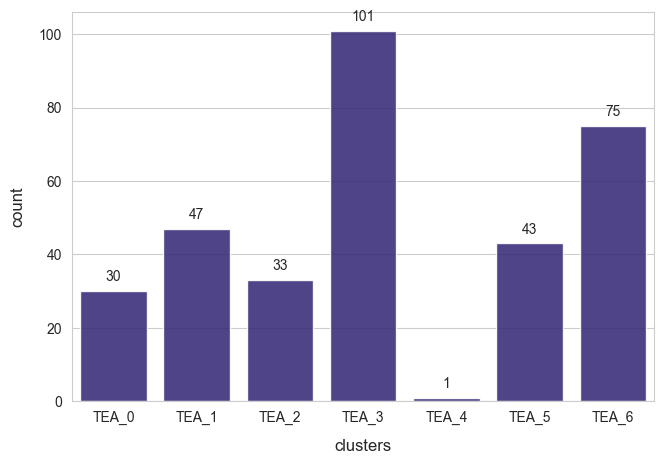

In [135]:
# 绘制每个聚类的样本数量的条形图。
cl.plot_clustercount() #output_path='PATH.jpg')

The code below generates a plot with the performance comparison between kmeans and aggomerative clustering.

以下代码生成了一个比较k-means聚类和凝聚聚类性能的图表。

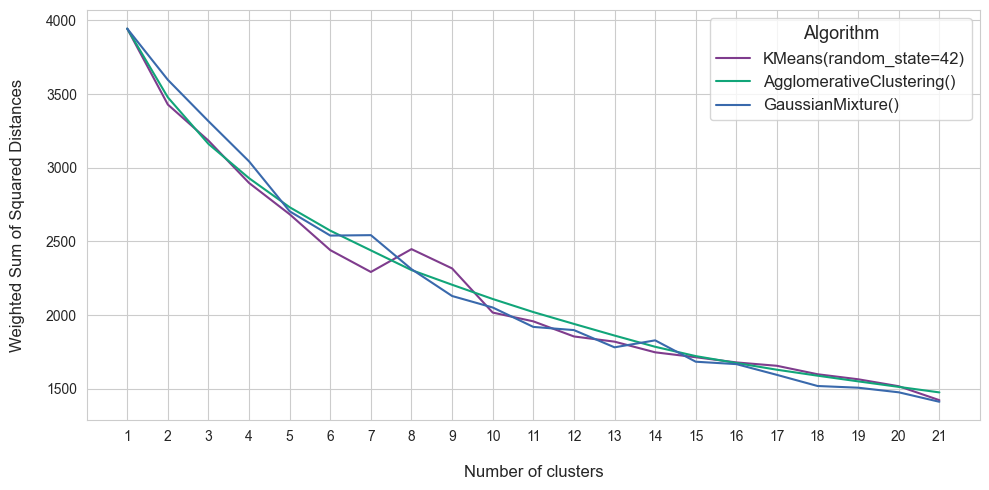

In [136]:
cl.plot_score_comparison()

# 横轴（Number of clusters）：表示聚类的数量，从 1 到 21。
# 纵轴（Weighted Sum of Squared Distances）：表示加权平方距离（Weighted Sum of Squared Distances），值越小表示聚类效果越好

The code below plots the normalized WSS and difference curve used by the elbow method.

以下代码绘制了用于肘部法则的标准化WSS（总平方和）和差分曲线。

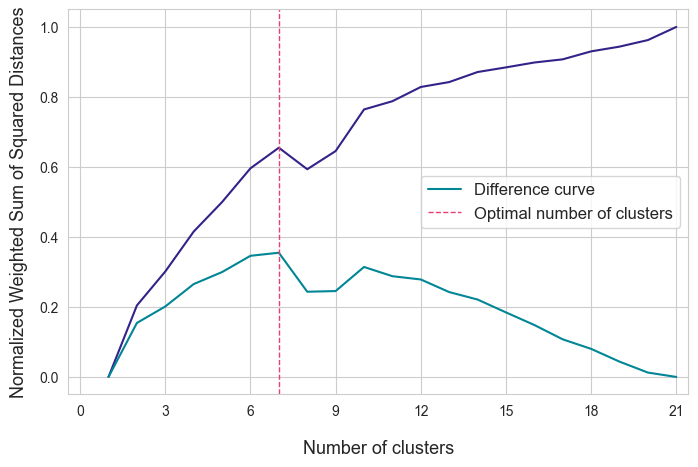

In [137]:
# 绘制肘部法则的标准化 WSS 和差分曲线。
cl.plot_optimal_components_normalized() #output_path='PATH.jpg')

## 3. Analysis of clusters 聚类分析

### 3.1. Descriptive statistics by cluster 按聚类的描述性统计

#### 3.1.1. Internal variables 内部变量

'Mean', 'Std', 'Median', 'Mode'  

均值、标准差、中位数和众数

In [138]:
# Internal variables 内部变量
# 查看指定内部变量（如 dim_01 和 dim_07）的均值。
cl.describe_clusters(variables=['dim_01', 'dim_07'], statistics='mean')

,cluster,dim_01,dim_07
,,mean,mean
0,0,0.3100,-0.2418
1,1,0.2865,0.2497
2,2,-0.4778,-0.3671
3,3,-0.1930,-0.3596
4,4,17.7740,1.0700
5,5,0.6918,-0.5741
6,6,-0.4670,0.9010


In [139]:
# 查看全部内部变量描述性统计
cl.describe_clusters()

cluster  dim_01                 dim_02                 dim_03          \
             mean  median    std    mean  median    std    mean  median   
0       0  0.3100 -0.0736 1.6289 -0.5382 -0.5959 0.6507 -2.7359 -2.4115   
1       1  0.2865  0.3074 0.8256  2.5424  2.0509 1.5726 -0.0762 -0.2238   
2       2 -0.4778 -0.3951 0.7123 -0.7740 -0.8469 0.7157  0.4215  0.2626   
3       3 -0.1930 -0.1667 0.6717 -0.4376 -0.5959 0.7869 -0.0318 -0.2231   
4       4 17.7740 17.7740    NaN  0.0120  0.0120    NaN -0.2243 -0.2243   
5       5  0.6918  0.4498 1.2331 -0.1073 -0.3450 0.8320  0.3418  0.7456   
6       6 -0.4670 -0.4801 0.6987 -0.3868 -0.3644 0.7561  0.8066  0.7499   

          dim_04                 dim_05                 dim_06                 \
     std    mean  median    std    mean  median    std    mean  median    std   
0 1.3502 -0.7649 -0.8512 0.8917  0.1957 -0.0565 1.1516 -0.0302 -0.2393 0.6757   
1 0.9654  0.3351  0.1669 1.1596 -0.1959 -0.4385 0.7665  0.3852  0.4820 0.9428   
2 0.8729 -0.2901 -0.3165 1.0228  2.0211  1.3053 1.7664  0.2641  0.3002 0.8212   
3 0.8466 -0.8117 -0.8220 0.7690 -0.1884 -0.3162 0.7000 -0.8006 -0.7666 0.8274   
4    NaN  0.3939  0.3939    NaN -0.3898 -0.3898    NaN -0.3639 -0.3639    NaN   
5 1.1082  0.9773  0.8775 0.8153  0.1601  0.2000 0.7688  0.9887  1.3067 0.5462   
6 1.0898  0.7511  0.8095 0.8671 -0.6777 -0.8298 0.3270  0.1707  0.1024 0.8998   

   dim_07                 dim_08                 dim_09                 \
     mean  median    std    mean  median    std    mean  median    std   
0 -0.2418 -0.2981 0.7600  0.5287  0.5049 0.9755 -0.1121 -0.0638 0.3237   
1  0.2497  0.2662 0.7871  0.2599  0.5049 0.9366  0.1927  0.1295 0.3530   
2 -0.3671 -0.3311 0.7160  0.5327  0.5049 1.0428 -0.0748 -0.1399 0.2990   
3 -0.3596 -0.3656 0.7376 -0.1318 -0.3104 0.8748 -0.2210 -0.2226 0.2578   
4  1.0700  1.0700    NaN  1.2183  1.2183    NaN -0.6506 -0.6506    NaN   
5 -0.5741 -0.3720 1.2782 -0.4004 -0.7180 0.9012  0.3790  0.3885 0.2994   
6  0.9010  0.7126 0.7971 -0.2180 -0.6161 1.0101  0.0460  0.0777 0.2885   

   dim_10                 dim_11                 dim_12                 \
     mean  median    std    mean  median    std    mean  median    std   
0  0.1728  0.2401 0.2590  0.0427  0.0276 0.2404  0.0018 -0.0043 0.1876   
1 -0.0205 -0.0149 0.2197 -0.0178 -0.0766 0.2027 -0.0318 -0.0282 0.1905   
2 -0.0357 -0.1434 0.2532 -0.0020 -0.0105 0.1520 -0.0511 -0.0814 0.2093   
3  0.1059  0.0766 0.2328  0.1158  0.1059 0.2140  0.0123 -0.0061 0.2277   
4  0.0705  0.0705    NaN -0.5352 -0.5352    NaN  0.4006  0.4006    NaN   
5 -0.1611 -0.2371 0.2279  0.0385  0.0414 0.2163  0.0631  0.0141 0.2982   
6 -0.0918 -0.1198 0.2123 -0.1759 -0.1801 0.1857 -0.0164 -0.0215 0.1935   

   dim_13                 dim_14                 dim_15                 \
     mean  median    std    mean  median    std    mean  median    std   
0  0.0855  0.0806 0.2792 -0.0225 -0.0567 0.2289  0.1183  0.1168 0.2688   
1 -0.0201  0.0124 0.1904  0.0458  0.0394 0.1539 -0.0109 -0.0211 0.1555   
2  0.1175  0.0948 0.1880  0.0221  0.0447 0.1614  0.0223  0.0458 0.1624   
3 -0.0123  0.0109 0.2441  0.0130 -0.0192 0.1989 -0.0316 -0.0181 0.2058   
4  0.0611  0.0611    NaN -0.0930 -0.0930    NaN  0.1793  0.1793    NaN   
5  0.0632  0.0545 0.1612 -0.0416 -0.0092 0.2467  0.0150  0.0066 0.1626   
6 -0.0937 -0.0843 0.1797 -0.0219 -0.0240 0.1716 -0.0187 -0.0324 0.1540   

   dim_16                 dim_17                 dim_18                 \
     mean  median    std    mean  median    std    mean  median    std   
0  0.0551  0.0778 0.1877  0.0995  0.0536 0.2474 -0.0066 -0.0219 0.2164   
1  0.0134 -0.0083 0.1675  0.0220  0.0178 0.1578 -0.0065 -0.0055 0.1641   
2 -0.0824 -0.0888 0.1777  0.0916  0.0687 0.1472 -0.0380 -0.0409 0.1536   
3 -0.0009 -0.0151 0.1971 -0.0555 -0.0386 0.2028 -0.0107 -0.0015 0.1758   
4  0.2198  0.2198    NaN -0.1372 -0.1372    NaN -0.1884 -0.1884    NaN   
5 -0.0141 -0.0117 0.1665  0.0348  0.0233 0.1268 -0.0065 -0.0226 0.1570   
6  

#### 3.1.2. External variables 外部变量

In [140]:
# External variables - We use (some of) the original variables
# 外部变量 - 我们使用（部分）原始变量。
# 外部变量的描述性统计
cl.describe_clusters(df_original[num_vars], variables=num_vars, statistics='mean')

,cluster,ATBG01,ATBR01A,ATBR01B,ATBR02A,ATBR02B,ATBR04,ATBR05,ATBGEAS,ATBGSOS,ATBGTJS,ATBGSLI,ATDGLIHY,ATDGRIHY
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,20.2333,18.0333,17.3000,1.8000,3.3000,300.0000,101.6667,8.5035,10.1369,9.5455,9.8749,205.2491,69.8695
1,1,17.5957,28.6170,28.5957,1.0000,2.1915,306.2766,354.0426,10.0360,11.5631,10.6718,10.7747,198.2405,225.0357
2,2,20.2727,30.6970,30.6061,6.5758,6.6667,240.8485,86.2121,9.1686,10.7736,10.3350,9.6397,157.1035,55.5200
3,3,13.7525,28.8515,28.7228,1.0792,2.3564,259.0792,110.2871,8.5698,9.6689,7.5666,9.6334,176.2088,74.6967
4,4,27.0000,28.0000,28.0000,0.0000,2.0000,1800.0000,150.0000,10.0465,9.8942,8.6795,12.3422,1146.0000,95.5000
5,5,11.1163,30.3721,30.2791,1.2326,3.7442,337.9070,139.3023,10.8131,12.6395,12.2358,9.2899,222.3588,90.0825
6,6,12.9067,32.4667,31.9867,0.2800,0.6133,244.1333,118.7067,10.4049,12.3617,10.0455,11.9508,156.5901,74.5246


In [141]:
# Use the original variables - Some of them
# 使用原始变量 - 其中一部分。

# 分类变量的分布
# GEN\作为教师\启发

cl.describe_clusters_cat(df_original['ATBG12D'], cat_name='ATBG12D', normalize=True)

ATBG12D,1.0000,2.0000,3.0000
Clusters,,,
TEA_0,0.2333,0.6667,0.1000
TEA_1,0.5532,0.3830,0.0638
TEA_2,0.6061,0.3030,0.0909
TEA_3,0.0891,0.5347,0.3762
TEA_4,0.0000,1.0000,0.0000
TEA_5,0.9302,0.0698,0.0000
TEA_6,0.4933,0.3600,0.1467


In [142]:
# 教师性别
cl.describe_clusters_cat(df_original['ATBG02'], cat_name='ATBG02', normalize=True)

ATBG02,1.0000,2.0000
Clusters,,
TEA_0,0.9000,0.1000
TEA_1,0.9574,0.0426
TEA_2,0.9394,0.0606
TEA_3,0.8911,0.1089
TEA_4,1.0000,0.0000
TEA_5,0.8605,0.1395
TEA_6,0.8800,0.1200


内部变量：降维之后的变量dim

外部变量：原始变量

### 3.2. Cluster means vs global means comparison 聚类均值与全局均值的比较

#### 3.2.1. Internal variables 内部变量

In [143]:
# 比较聚类均值与全局均值的差异。
cl.compare_cluster_means_to_global_means()

,cluster,dim_01,dim_02,dim_03,dim_04,dim_05,dim_06,dim_07,dim_08,dim_09,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19,dim_20,dim_21
0,0,0.3100,-0.5382,-2.7359,-0.7649,0.1957,-0.0302,-0.2418,0.5287,-0.1121,0.1728,0.0427,0.0018,0.0855,-0.0225,0.1183,0.0551,0.0995,-0.0066,-0.0321,0.0441,0.0166
1,1,0.2865,2.5424,-0.0762,0.3351,-0.1959,0.3852,0.2497,0.2599,0.1927,-0.0205,-0.0178,-0.0318,-0.0201,0.0458,-0.0109,0.0134,0.0220,-0.0065,-0.0034,-0.0421,-0.0681
2,2,-0.4778,-0.7740,0.4215,-0.2901,2.0211,0.2641,-0.3671,0.5327,-0.0748,-0.0357,-0.0020,-0.0511,0.1175,0.0221,0.0223,-0.0824,0.0916,-0.0380,0.0209,0.0412,0.0325
3,3,-0.1930,-0.4376,-0.0318,-0.8117,-0.1884,-0.8006,-0.3596,-0.1318,-0.2210,0.1059,0.1158,0.0123,-0.0123,0.0130,-0.0316,-0.0009,-0.0555,-0.0107,0.0115,-0.0087,-0.0113
4,4,17.7740,0.0120,-0.2243,0.3939,-0.3898,-0.3639,1.0700,1.2183,-0.6506,0.0705,-0.5352,0.4006,0.0611,-0.0930,0.1793,0.2198,-0.1372,-0.1884,-0.2091,-0.0030,0.0506
5,5,0.6918,-0.1073,0.3418,0.9773,0.1601,0.9887,-0.5741,-0.4004,0.3790,-0.1611,0.0385,0.0631,0.0632,-0.0416,0.0150,-0.0141,0.0348,-0.0065,0.0479,0.0407,0.0232
6,6,-0.4670,-0.3868,0.8066,0.7511,-0.6777,0.1707,0.9010,-0.2180,0.0460,-0.0918,-0.1759,-0.0164,-0.0937,-0.0219,-0.0187,0.0122,-0.0373,0.0440,-0.0344,-0.0210,0.0230


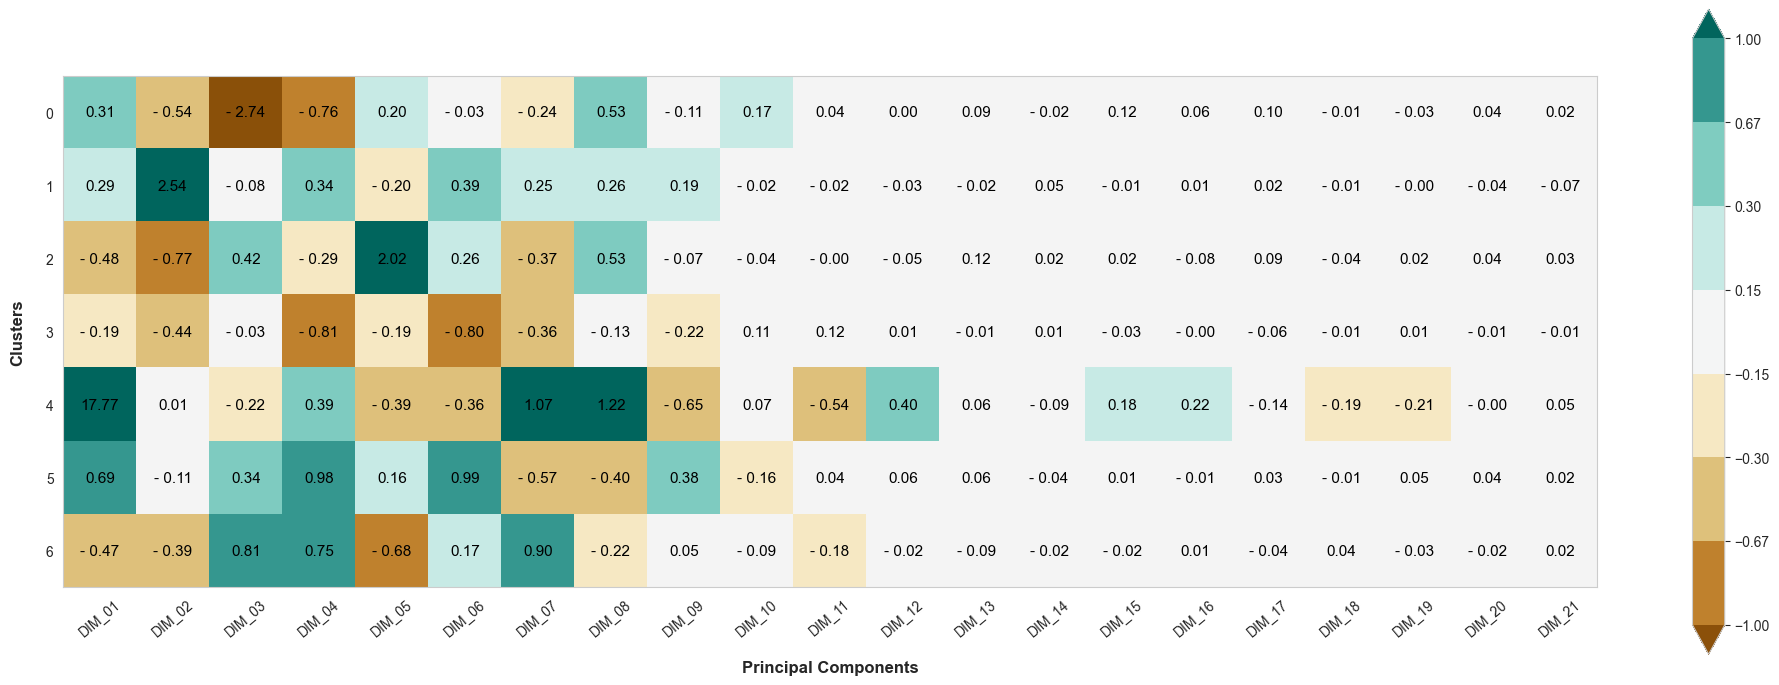

In [144]:
# 比较聚类均值与全局均值的差异，并可视化。
# Principal Components 主成分
# Clusters 聚类（簇）
cl.plot_cluster_means_to_global_means_comparison(xlabel='Principal Components', ylabel='Clusters', 
                                                 levels=[-1, -0.67, -0.3, -0.15, 0.15, 0.3, 0.67, 1])

#### 3.2.2. External variables 外部变量

Note that for external variables we normalize variables to the 0-1 scale in order to make fair comparisons.

注意，对于外部变量，我们将变量标准化到0-1范围内，以便进行公平的比较。


In [145]:
mms = MinMaxScaler()

In [146]:
# 对外部变量进行标准化后，比较聚类均值与全局均值。
cl.compare_cluster_means_to_global_means(pd.DataFrame(mms.fit_transform(df_original[num_vars_sel]), columns=num_vars_sel))

,cluster,ATBG01,ATBR01A,ATBR01B,ATBR02A,ATBR02B,ATBR04,ATBR05,ATBGEAS,ATBGSOS,ATBGTJS,ATBGSLI,ATDGLIHY,ATDGRIHY
0,0,0.3694,-0.4226,-0.4290,0.1856,0.2532,0.0801,-0.3339,-0.2392,-0.1895,-0.0164,-0.0577,0.1205,-0.2897
1,1,0.1816,-0.0161,-0.0075,-0.3413,-0.1678,0.1043,1.4998,0.1123,0.0936,0.1777,0.0620,0.0797,1.4450
2,2,0.3722,0.0638,0.0675,3.3313,1.5316,-0.1481,-0.4462,-0.0866,-0.0631,0.1197,-0.0890,-0.1601,-0.4501
3,3,-0.0921,-0.0071,-0.0028,-0.2891,-0.1052,-0.0778,-0.2713,-0.2239,-0.2824,-0.3576,-0.0899,-0.0487,-0.2357
4,4,0.8511,-0.0398,-0.0297,-1.0000,-0.2405,5.8662,0.0172,0.1147,-0.2377,-0.1657,0.2707,5.6037,-0.0031
5,5,-0.2797,0.0513,0.0553,-0.1881,0.4218,0.2263,-0.0605,0.2905,0.3073,0.4474,-0.1356,0.2203,-0.0637
6,6,-0.1523,0.1318,0.1190,-0.8156,-0.7671,-0.1354,-0.2101,0.1969,0.2522,0.0698,0.2186,-0.1631,-0.2376


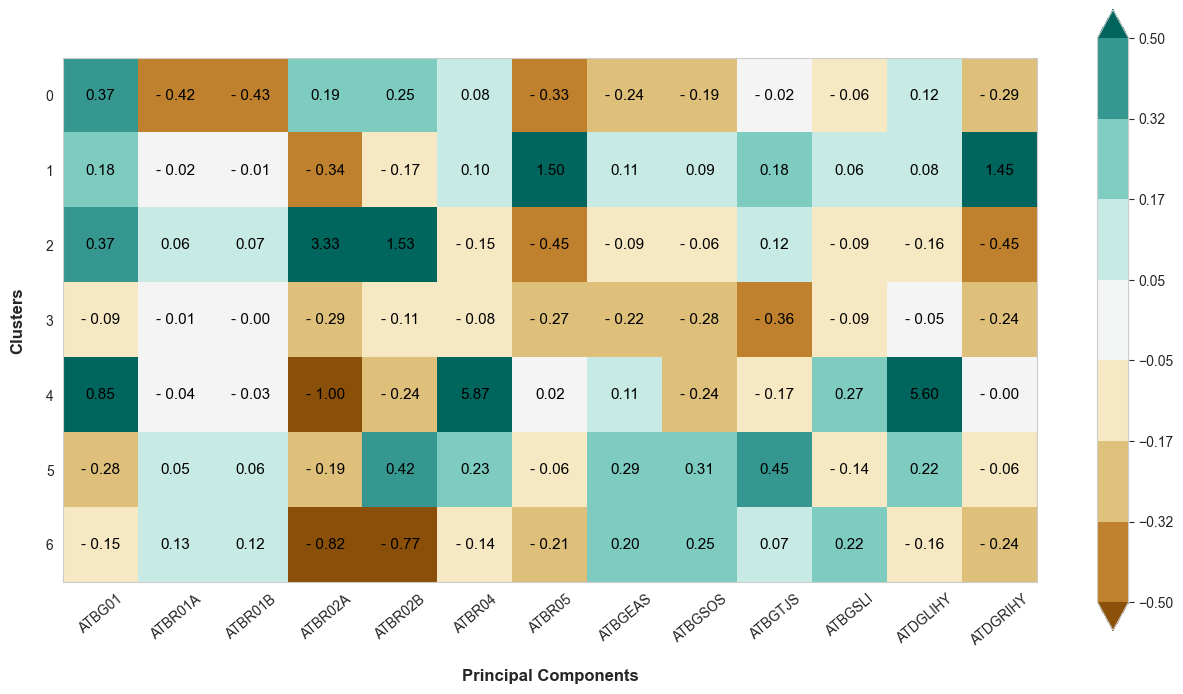

In [147]:
# Principal Components 主成分
# Clusters 聚类（簇）
# 对外部变量（筛选出来的数值变量）比较聚类均值与全局均值。
cl.plot_cluster_means_to_global_means_comparison(df_original=pd.DataFrame(mms.fit_transform(df_original[num_vars_sel]), columns=num_vars_sel), 
                                                 xlabel='Principal Components', ylabel='Clusters', use_weights=True)

### 3.3. Significance tests 显著性测试

In [148]:
# ANOVA tests for internal variables 内部变量的 ANOVA 测试
# 对内部变量进行 ANOVA 测试，分析聚类之间的显著性差异。
cl.anova_tests(cluster_filter=[4, 5], vars_test=['dim_01', 'dim_05', 'dim_12'])

,var_name,df,sum_sq,mean_sq,F,PR(>F)
0,dim_01,1.0000,285.1703,285.1703,187.5319,0.0000
1,dim_05,1.0000,0.2956,0.2956,0.5000,0.4834
2,dim_12,1.0000,0.1113,0.1113,1.2517,0.2696


In [149]:
cl.anova_tests(cluster_filter=[4, 5], vars_test=['dim_02', 'dim_03'])

,var_name,df,sum_sq,mean_sq,F,PR(>F)
0,dim_02,1.0000,0.0139,0.0139,0.0201,0.8880
1,dim_03,1.0000,0.3131,0.3131,0.2549,0.6163


In [150]:
# ANOVA tests for External variables
# ANOVA测试（方差分析）用于外部变量
# ATBR10G：阅读\发展策略\概括
# ATBR09D：阅读\多久鼓励\发展理解

cl.anova_tests(cluster_filter=[4, 5], df_test=df_original[['ATBR10G', 'ATBR09D']])

,var_name,df,sum_sq,mean_sq,F,PR(>F)
0,ATBR10G,1.0000,2.4440,2.4440,8.2347,0.0064
1,ATBR09D,1.0000,0.3303,0.3303,0.9591,0.3330


In [151]:
# 分类变量
# 性别
cl.chi2_test(df_original['ATBG02'])

{'chi2': np.float64(3.5727512055180455),
 'p': np.float64(0.7342666542623641),
 'dof': 6}

In [152]:
# 分类变量
# GEN\作为教师\启发
cl.chi2_test(df_original['ATBG12D'])

{'chi2': np.float64(121.7110991494834),
 'p': np.float64(2.8161402942329143e-20),
 'dof': 12}

In [153]:
# ATDGEAS 学校强调学术成功-教师/指数
cl.chi2_test(df_original['ATDGEAS'])

{'chi2': np.float64(100.69387515591067),
 'p': np.float64(4.0710384242288485e-16),
 'dof': 12}

### 3.4. Distribution comparisons (visualizations) for numerical variables
数值变量的分布比较（可视化）


#### 3.4.1. Internal variables 内部变量

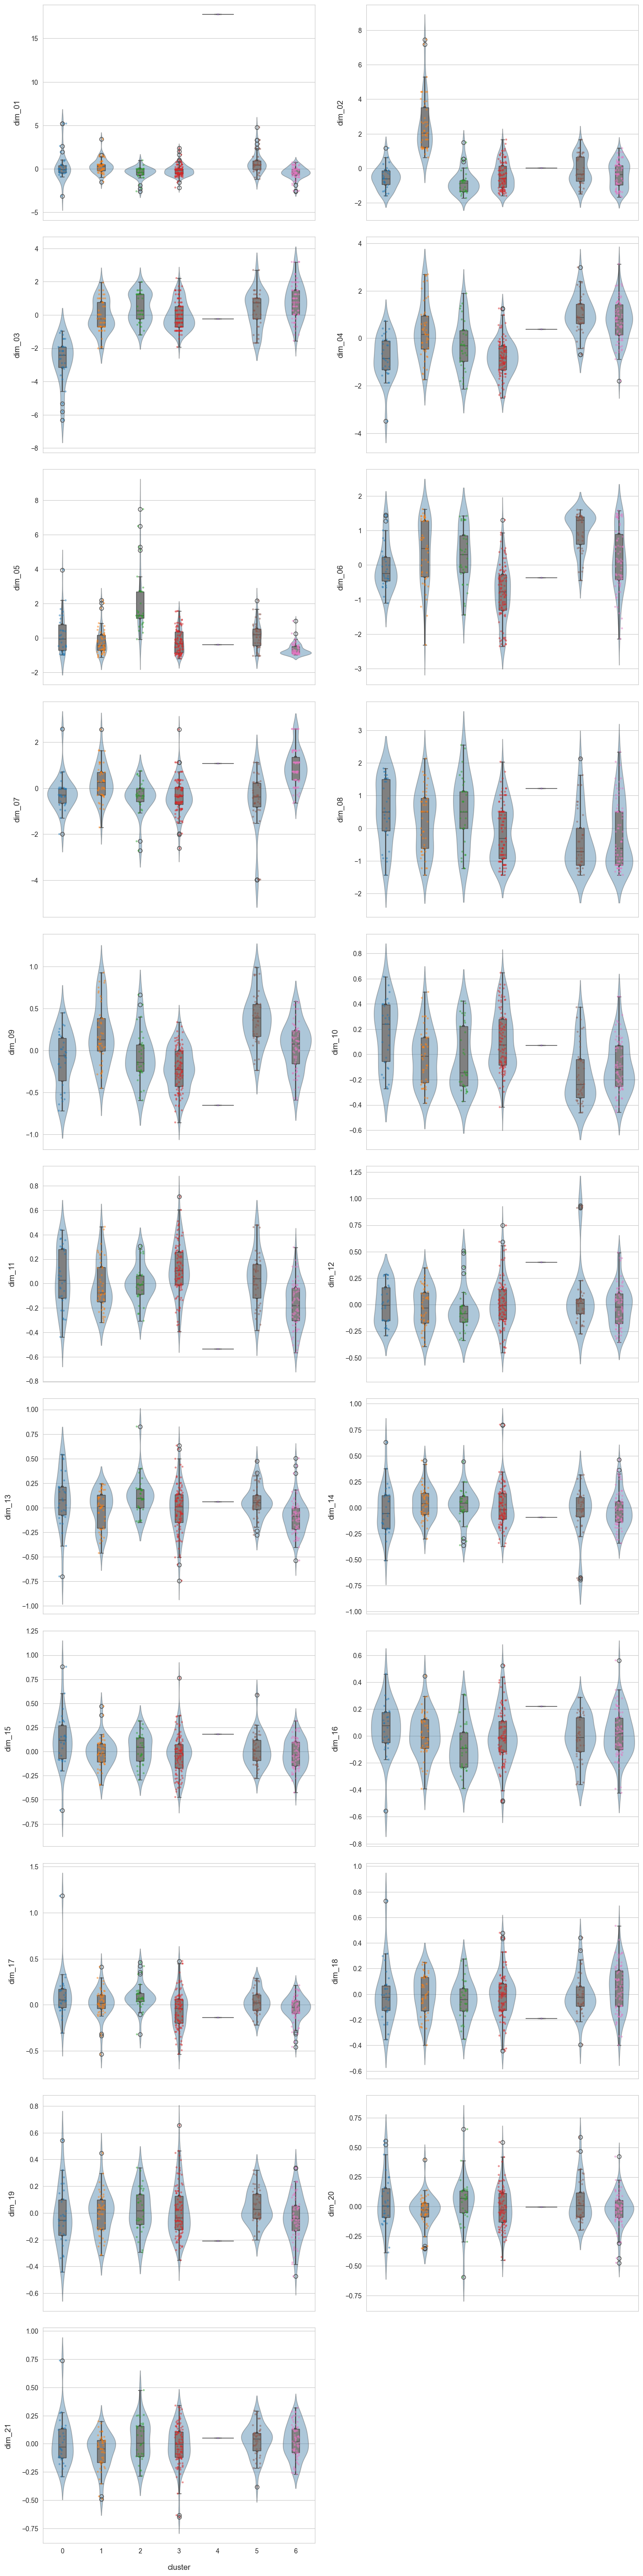

In [154]:
# Internal variables 内部变量
cl.plot_distribution_comparison_by_cluster()

#### 3.4.2. External variables 外部变量

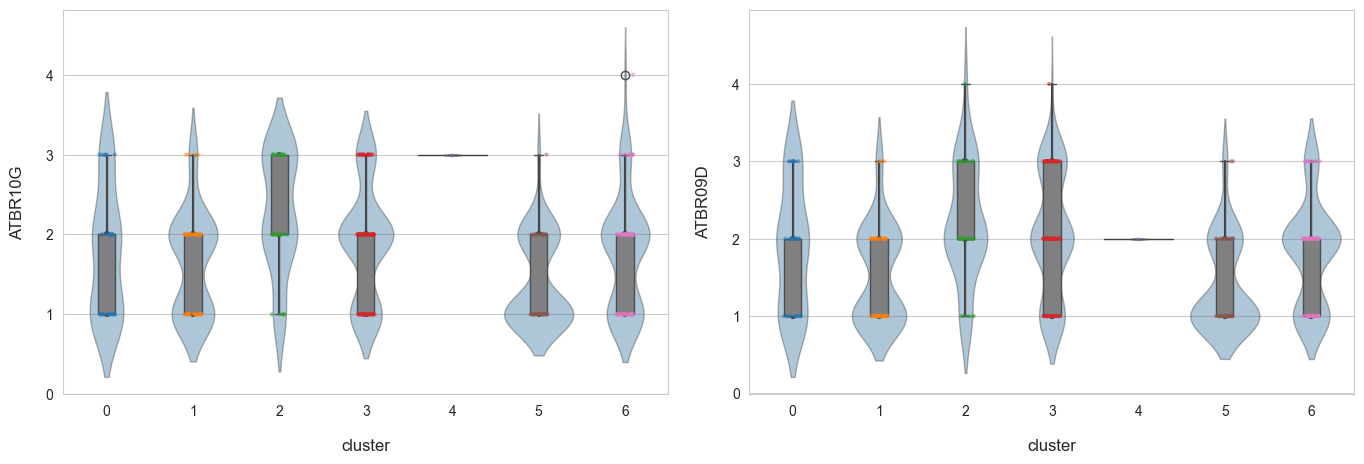

In [155]:
# External variables 外部变量
# ATBR10G：阅读\发展策略\概括
# ATBR09D：阅读\多久鼓励\发展理解
cl.plot_distribution_comparison_by_cluster(df_ext=df_original[['ATBR10G', 'ATBR09D']])

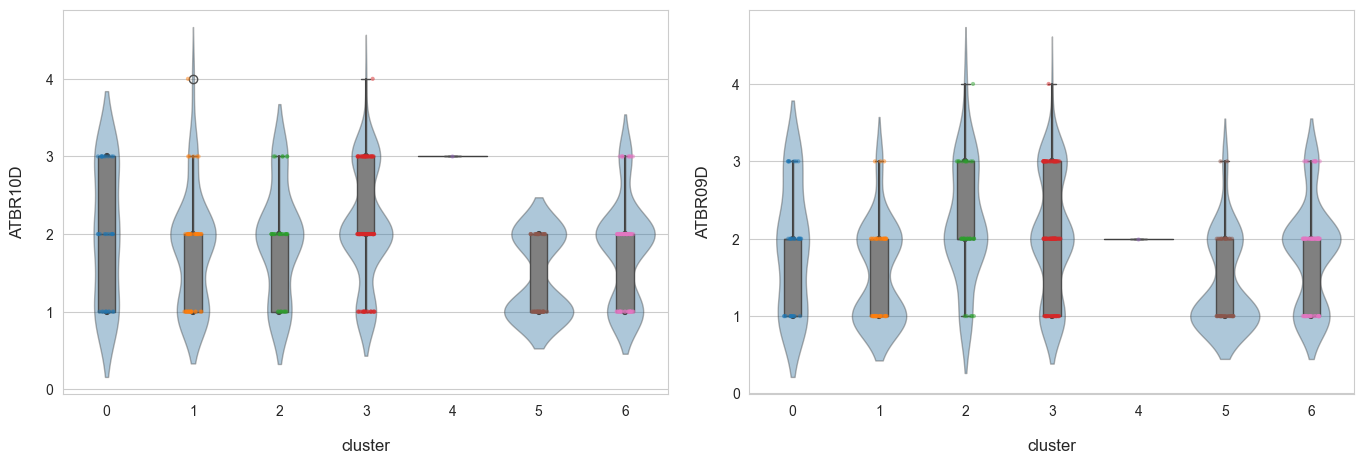

In [156]:
# External variables 外部变量
cl.plot_distribution_comparison_by_cluster(df_ext=df_original[['ATBR10D', 'ATBR09D']])

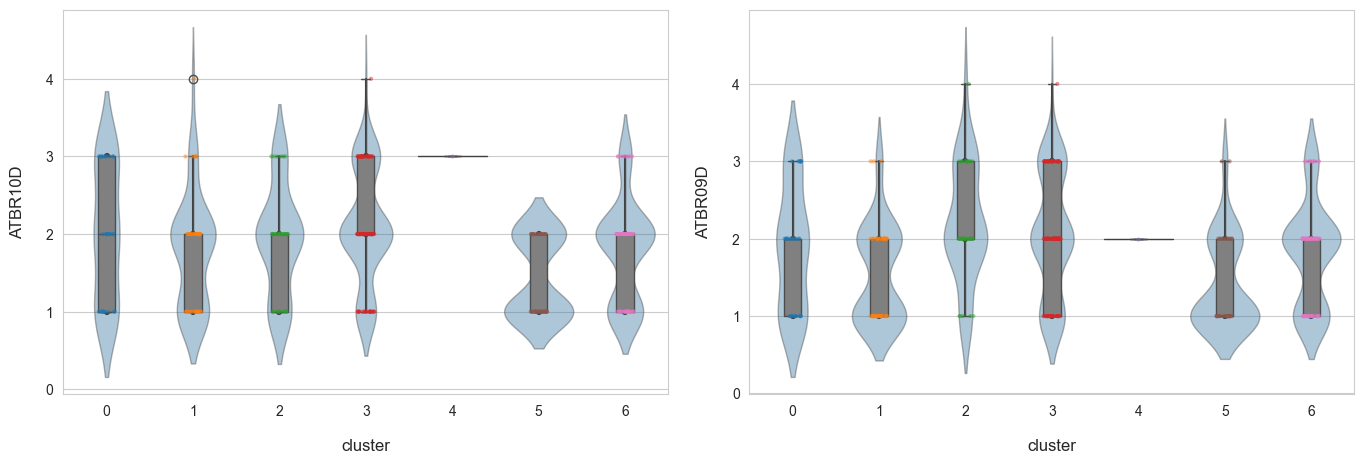

In [157]:
cl.plot_distribution_comparison_by_cluster(df_ext=df_original[['ATBR10D', 'ATBR09D']]) #, output_path='PATH.jpg')

### 3.5. 2-Dimensional plots for numerical variables 2D 数值变量的可视化

d:\XAI\XAI-Cluster\notebooks2\clearn\clustering\viz_utils.py:344: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=x, y=y, hue=hue, data=df, levels=1, alpha=0.2, palette=palette,


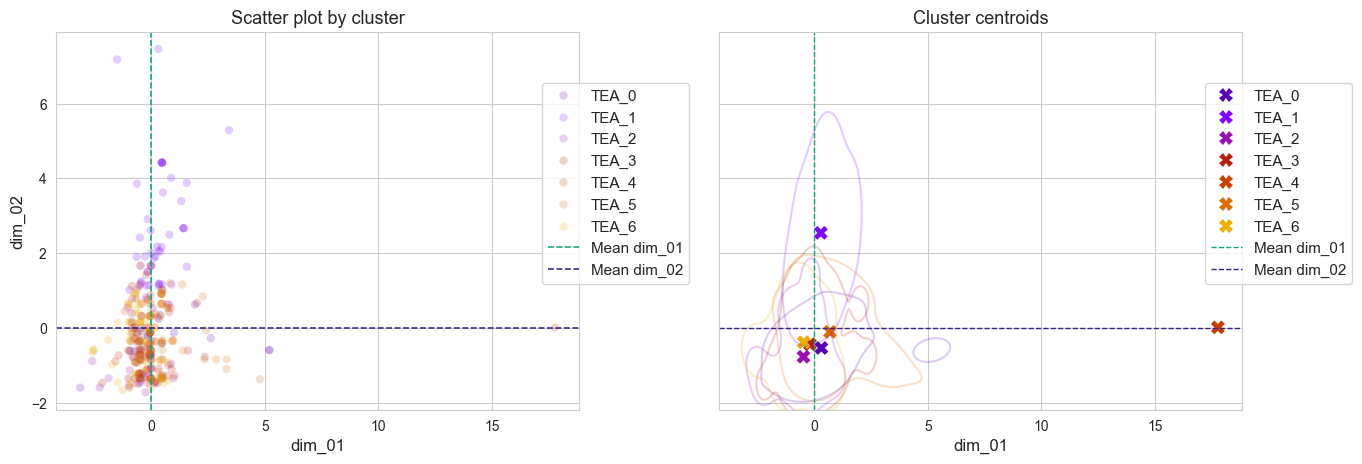

In [158]:
# Internal variables 内部变量
cl.plot_clusters_2D('dim_01', 'dim_02', style_kwargs=dict(kdeplot=True, alpha=0.2)) #, output_path='PATH.jpg')

d:\XAI\XAI-Cluster\notebooks2\clearn\clustering\viz_utils.py:344: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=x, y=y, hue=hue, data=df, levels=1, alpha=0.2, palette=palette,


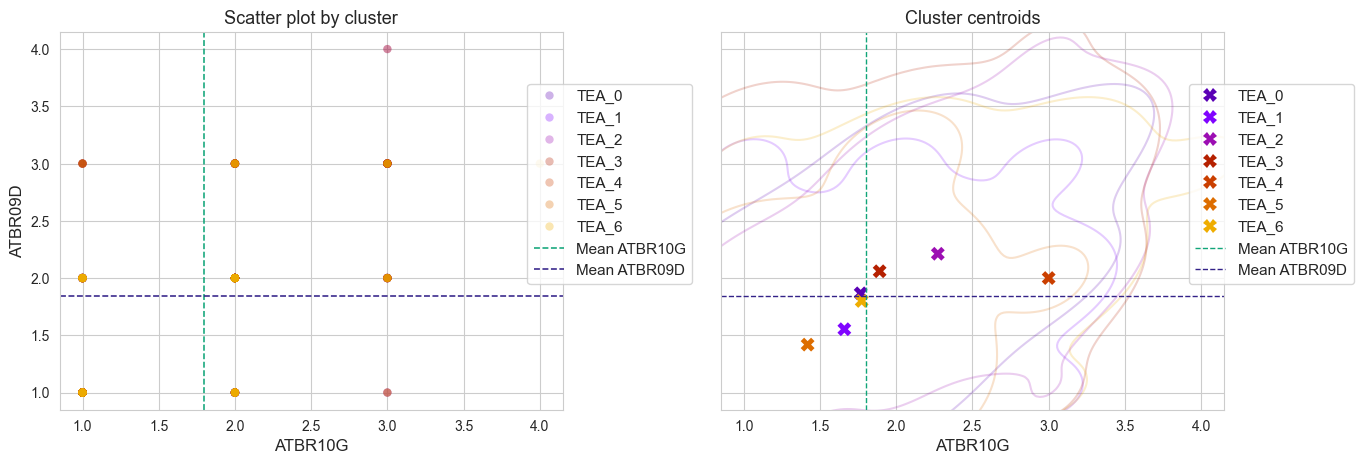

In [159]:
#External Variables 外部变量
# ATBR10G：阅读\发展策略\概括
# ATBR09D：阅读\多久鼓励\发展理解
cl.plot_clusters_2D(df_original['ATBR10G'], df_original['ATBR09D'])

### 3.6. Distribution comparisons (visualization) for categorical variables 

分类变量的分布比较（可视化）

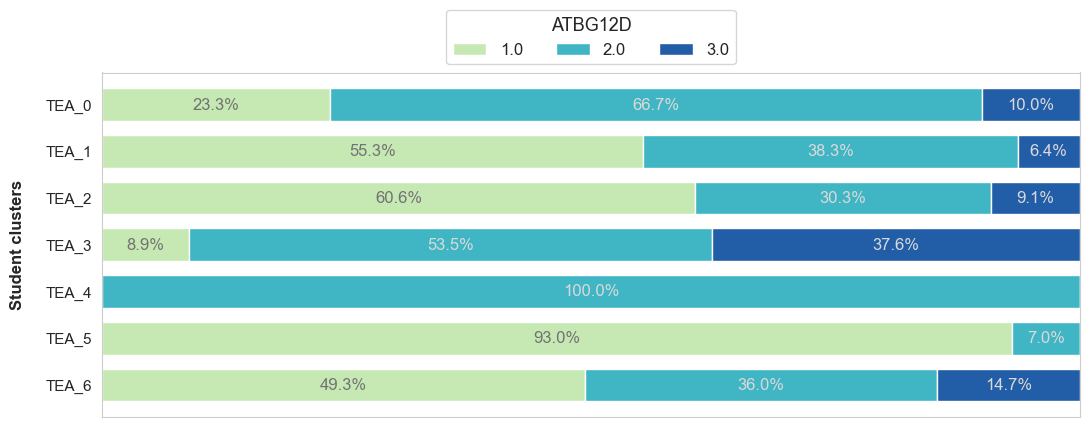

In [160]:
# 分类变量的分布可视化
cl.plot_cat_distribution_by_cluster(df_original['ATBG12D'], cat_label='ATBG12D', cluster_label='Teacher clusters')

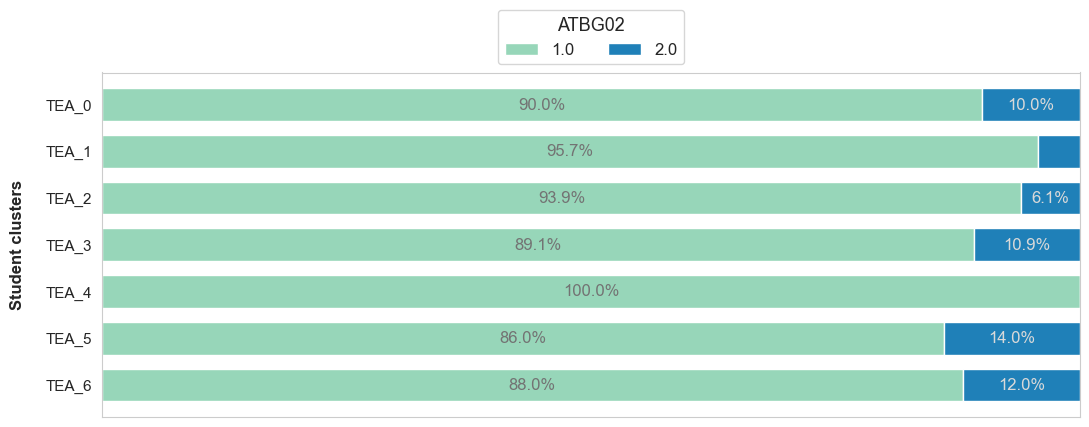

In [161]:
cl.plot_cat_distribution_by_cluster(df_original['ATBG02'], cat_label='ATBG02', cluster_label='Student clusters')

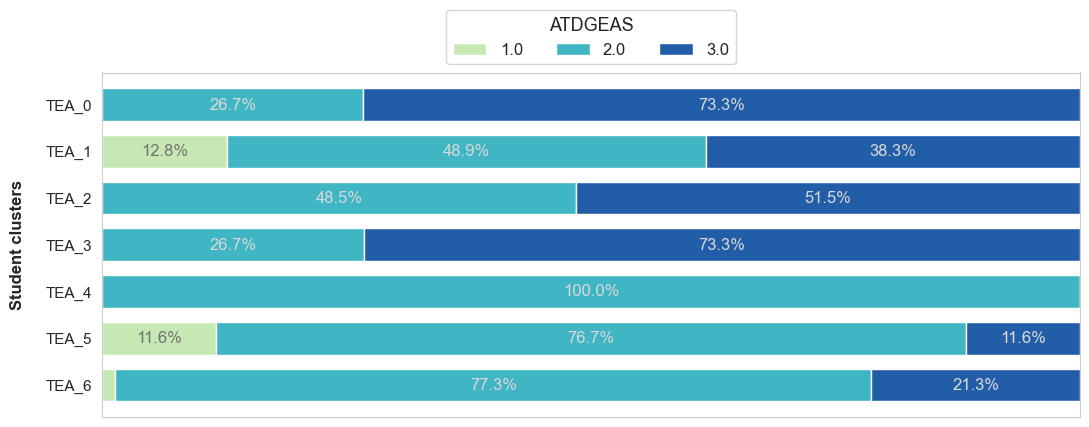

In [162]:
# ATDGEAS 学校强调学术成功-教师/指数
cl.plot_cat_distribution_by_cluster(df_original['ATDGEAS'], cat_label='ATDGEAS', cluster_label='Student clusters')

## Export results 导出结果

Export results: 导出结果
- One data set with the clusters associated to the extracted components;
- 一个数据集，其中包含与提取的成分相关的聚类。

- Another one with the clusters associated to the original data.
- 另一个数据集，其中包含与原始数据相关的聚类。


In [163]:
cl.df.to_csv('data2/ATG_modified_preprocessed_dim_red_clustered_output.csv', index=False)

In [164]:
df_original['cluster'] = cl.df['cluster'].values
df_original['cluster_cat'] = cl.df['cluster_cat'].values
df_original.to_csv('data2/ATG_modified_preprocessed_clustered_output.csv', index=False)

## Reproducibility 可重复性

In [165]:
df_ref = pd.read_csv('data2/ATG_modified_preprocessed_dim_red_clustered_output.csv')

print('Diff', (df_ref['cluster'] != cl.df['cluster']).sum())

Diff 0
